In [3]:

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

In [4]:
data_dir = '/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv'
df = pd.read_csv(data_dir, parse_dates= True , index_col= "Date")

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


In [10]:
df.shape

(2956, 6)

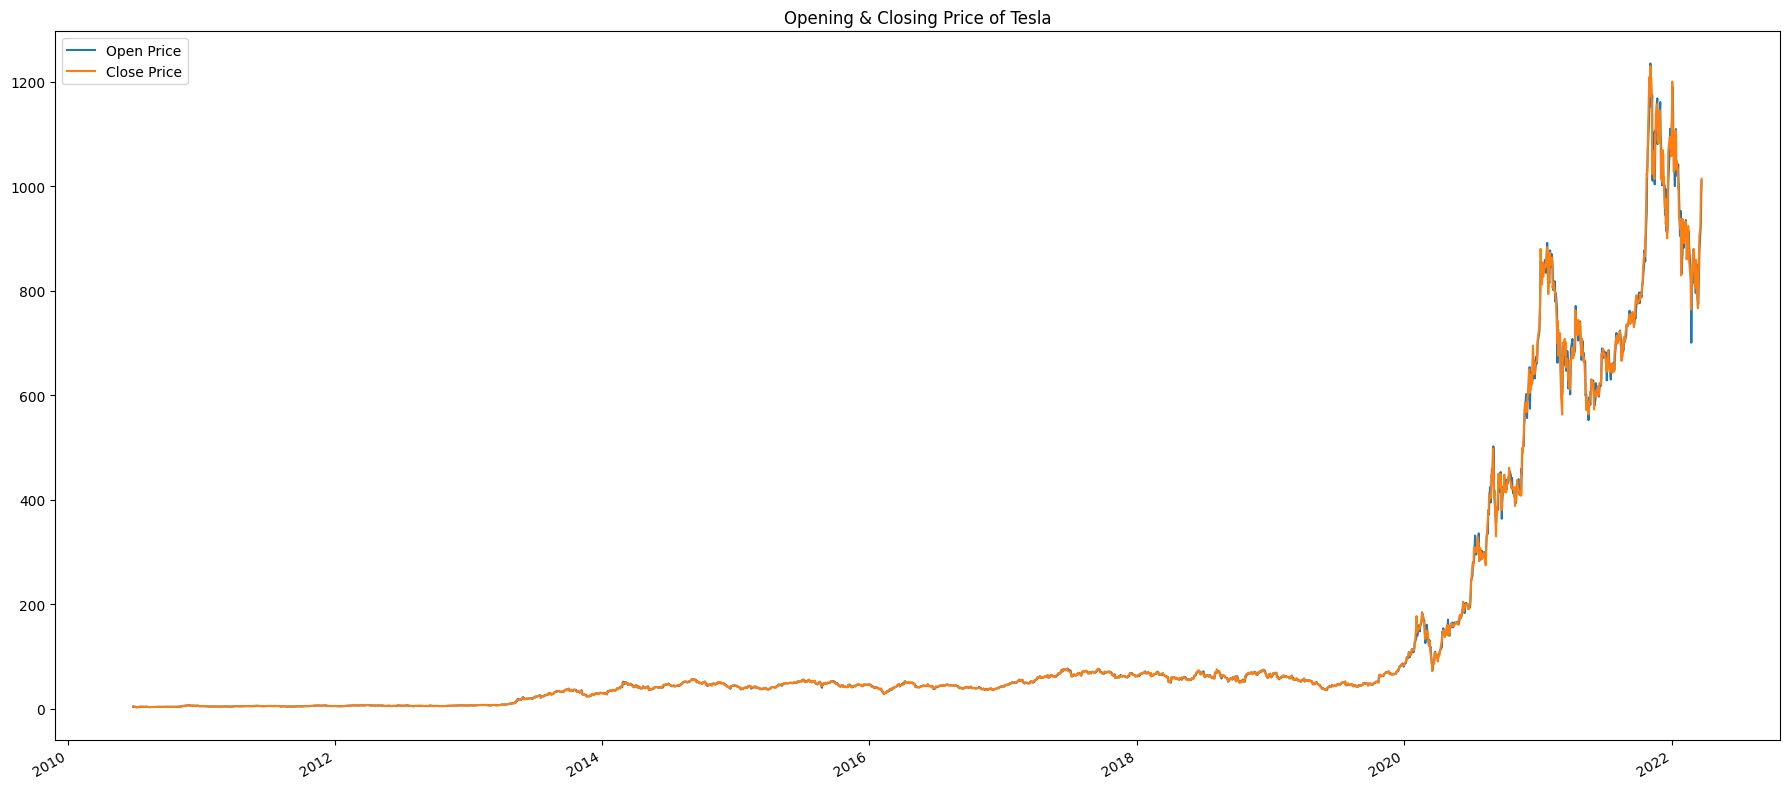

In [11]:
plt.figure(figsize=(18, 8))
df['Open'].plot()
df['Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of Tesla")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

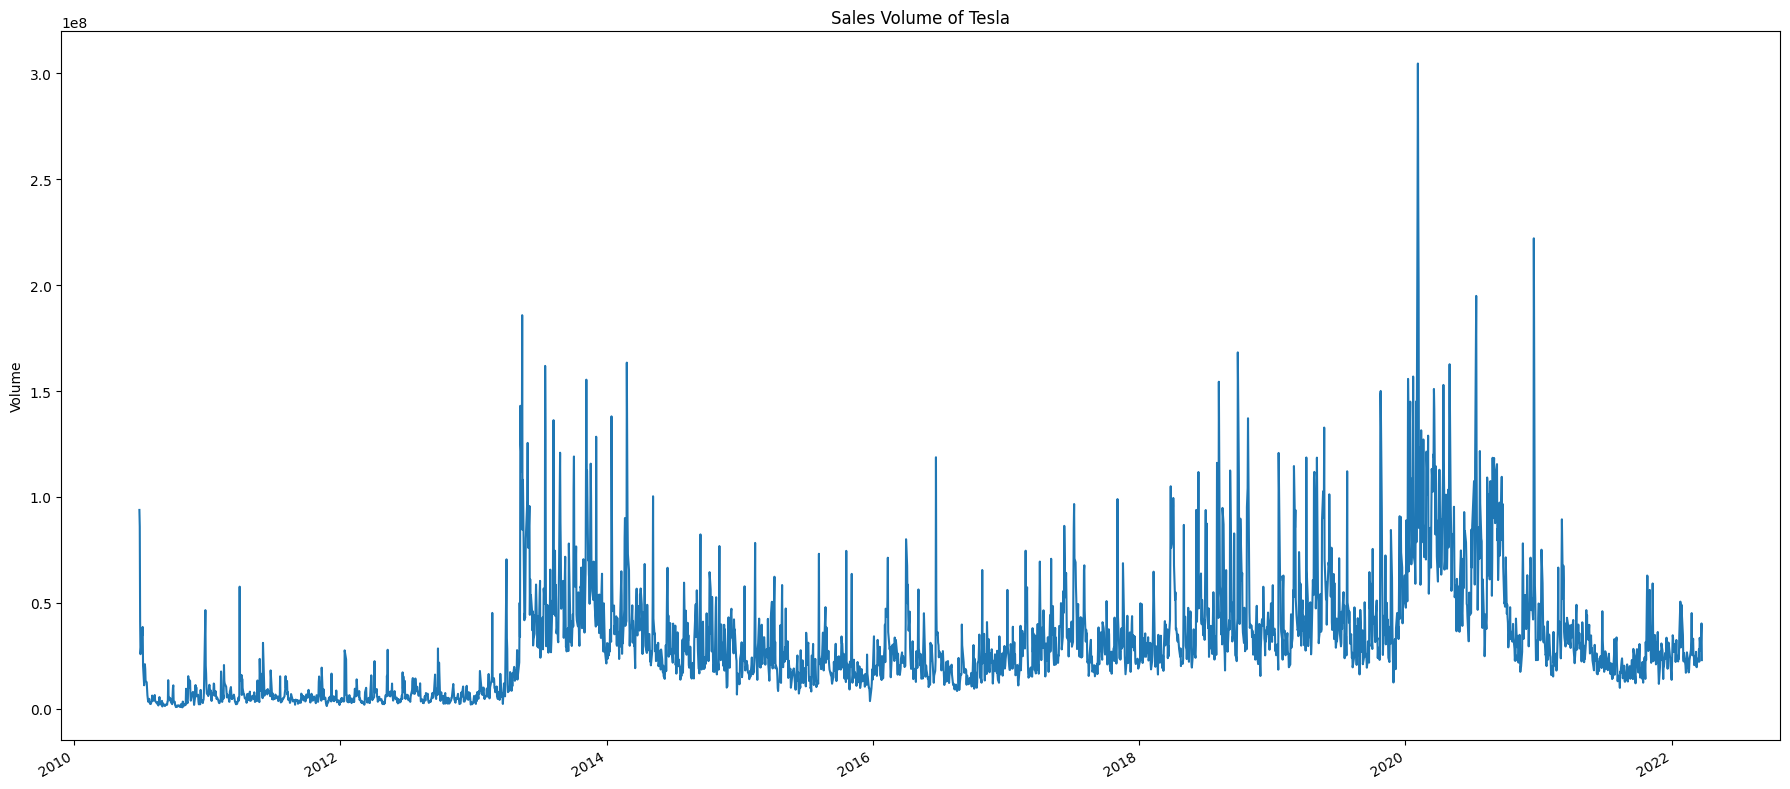

In [13]:
plt.figure(figsize=(18, 8))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()

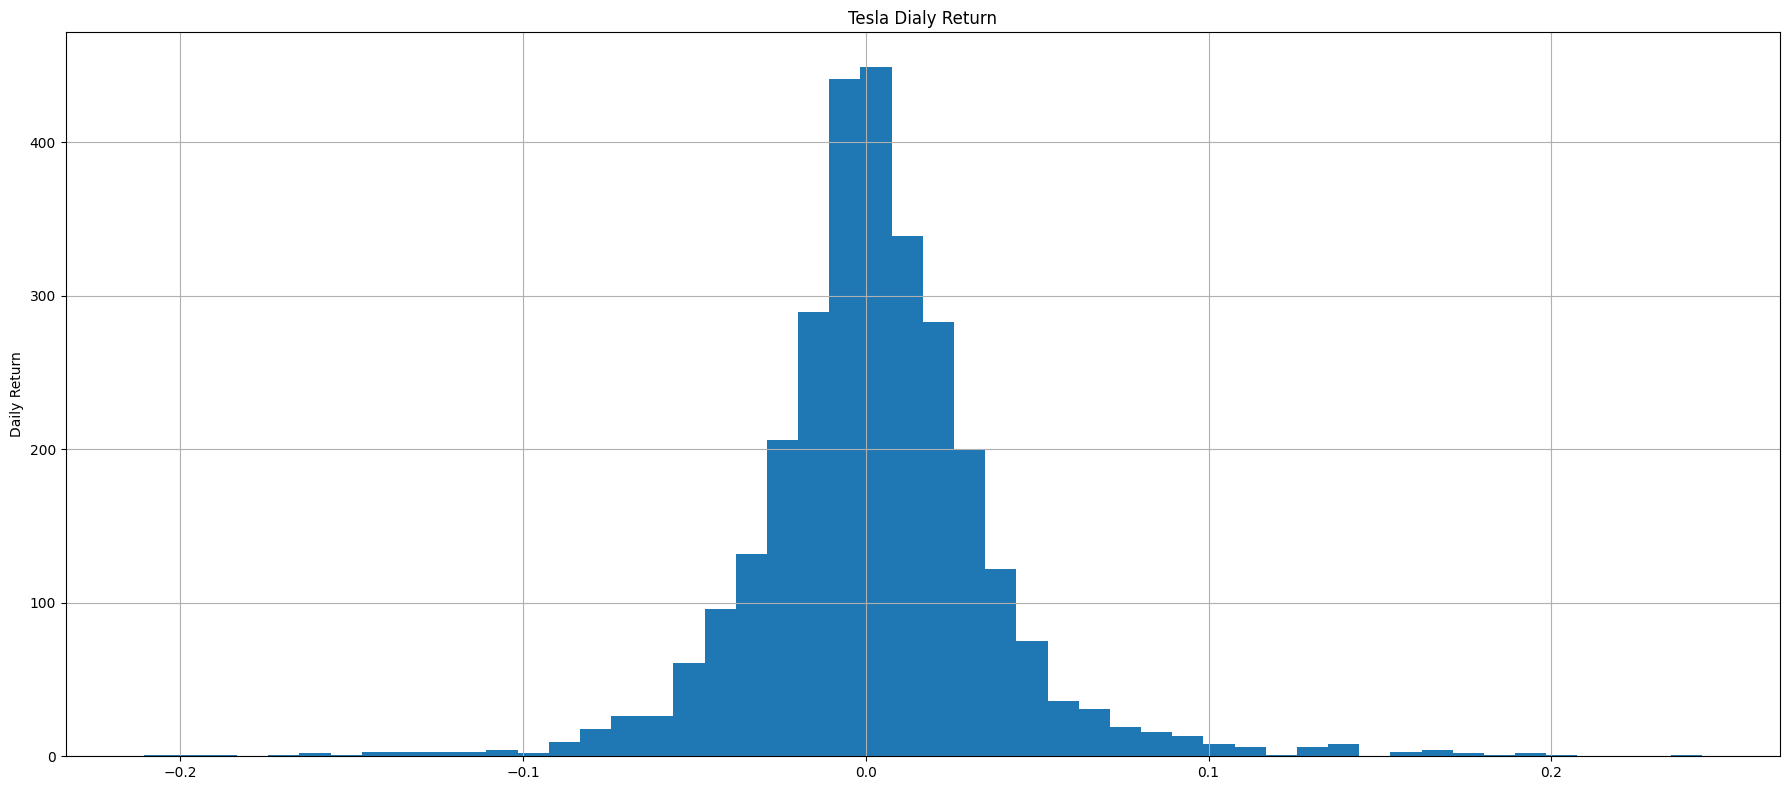

In [14]:
plt.figure(figsize=(18, 8))
df['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Tesla Dialy Return')
plt.tight_layout()
plt.show()

In [20]:
fulldf=df['Close']
fulldf=pd.DataFrame(fulldf)

dataset=fulldf.values
dataset.shape

(2956, 1)

In [21]:
dataset

array([[   4.778   ],
       [   4.766   ],
       [   4.392   ],
       ...,
       [ 993.97998 ],
       [ 999.109985],
       [1013.919983]])

In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [24]:
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [27]:
train_size = int(len(dataset)*.70)
test_size = len(dataset) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2069 Test Size : 887


In [28]:
train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

In [29]:
train_data.shape, test_data.shape

((2069, 1), (947, 1))

In [31]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [32]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape , y_train.shape

((2009, 60), (2009,))

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
x_train.shape , y_train.shape

((2009, 60, 1), (2009,))

In [53]:
model_LSTM = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model_LSTM.compile(optimizer= 'adam', loss= 'mean_squared_error' )

In [54]:
model_LSTM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]



In [56]:
history = model_LSTM.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.5409e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.8248e-06
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.0575e-06
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.5164e-06
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.1200e-06
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 5.6478e-06
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.8175e-06
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.4952e-06
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.1060e-06
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.8528e-06
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.5787e-06
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.7587e-06
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.0745e-06
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.9293e-06
E

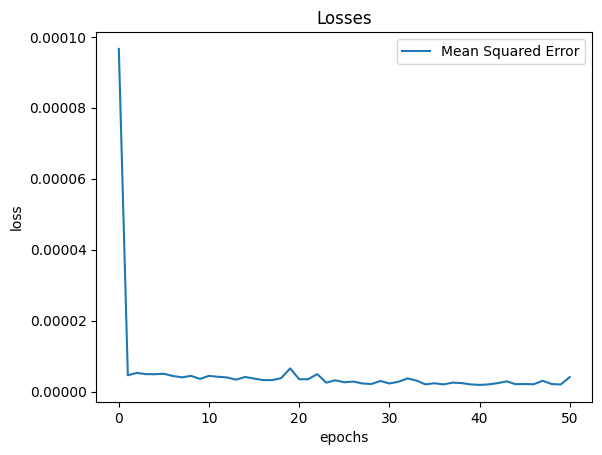

In [57]:
plt.plot(history.history["loss"])
plt.legend(['Mean Squared Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [58]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
x_test.shape , y_test.shape

((887, 60, 1), (887,))

In [60]:
predictions = model_LSTM.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [61]:
predictions

array([[0.045659  ],
       [0.0462748 ],
       [0.04619423],
       [0.04647768],
       [0.04678064],
       [0.04703219],
       [0.04720981],
       [0.04735778],
       [0.04783152],
       [0.04820708],
       [0.04650664],
       [0.04649656],
       [0.04671154],
       [0.04668687],
       [0.04599477],
       [0.0443261 ],
       [0.04219774],
       [0.04100704],
       [0.04025211],
       [0.03968903],
       [0.0396769 ],
       [0.03995027],
       [0.04105545],
       [0.04199701],
       [0.04227692],
       [0.04203723],
       [0.04168203],
       [0.04285757],
       [0.04406492],
       [0.04615228],
       [0.04874939],
       [0.05102397],
       [0.05231816],
       [0.05317593],
       [0.05390109],
       [0.05443575],
       [0.05449278],
       [0.05430259],
       [0.0543647 ],
       [0.05464572],
       [0.0548977 ],
       [0.0542063 ],
       [0.05366379],
       [0.0535647 ],
       [0.05387969],
       [0.05455691],
       [0.05517648],
       [0.055

In [62]:
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

384.07

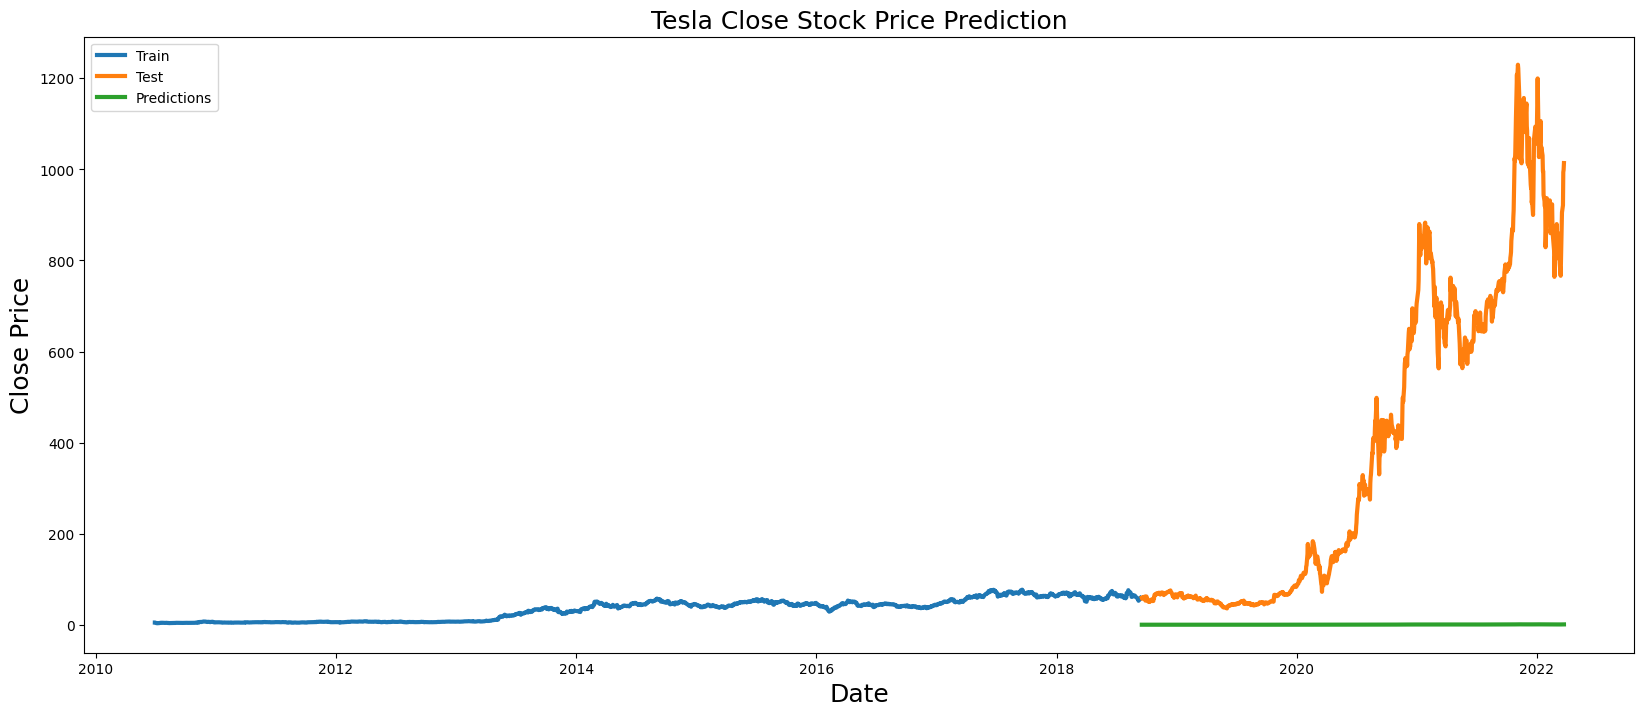

In [63]:
train = fulldf.iloc[:train_size , 0:1]
test = fulldf.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (20, 8))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [64]:
from datetime import timedelta

In [65]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [66]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model_LSTM.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.74156886]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.74156886, 0.74137866]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.74156886, 0.74137866, 0.73062867]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379, 0.678772]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379, 0.678772, 0.6600286]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379, 0.678772, 0.6600286, 0.64163226]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379, 0.678772, 0.6600286, 0.64163226, 0.6239111]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0.74156886, 0.74137866, 0.73062867, 0.7150987, 0.697379, 0.678772, 0.6600286, 0.64163226, 0.623911

In [67]:
time

[Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-03-26 00:00:00'),
 Timestamp('2022-03-27 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-02 00:00:00'),
 Timestamp('2022-04-03 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-09 00:00:00'),
 Timestamp('2022-04-10 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-13 00:00:00'),
 Timestamp('2022-04-14 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-04-16 00:00:00'),
 Timestamp('2022-04-17 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-

In [68]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [69]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

In [70]:
df_result

,Date,Forecasted
0,2022-03-24,912.879639
1,2022-03-25,912.646301
2,2022-03-26,899.458801
3,2022-03-27,880.407349
4,2022-03-28,858.669739
5,2022-03-29,835.843567
6,2022-03-30,812.850098
7,2022-03-31,790.282410
8,2022-04-01,768.542969
9,2022-04-02,747.903381


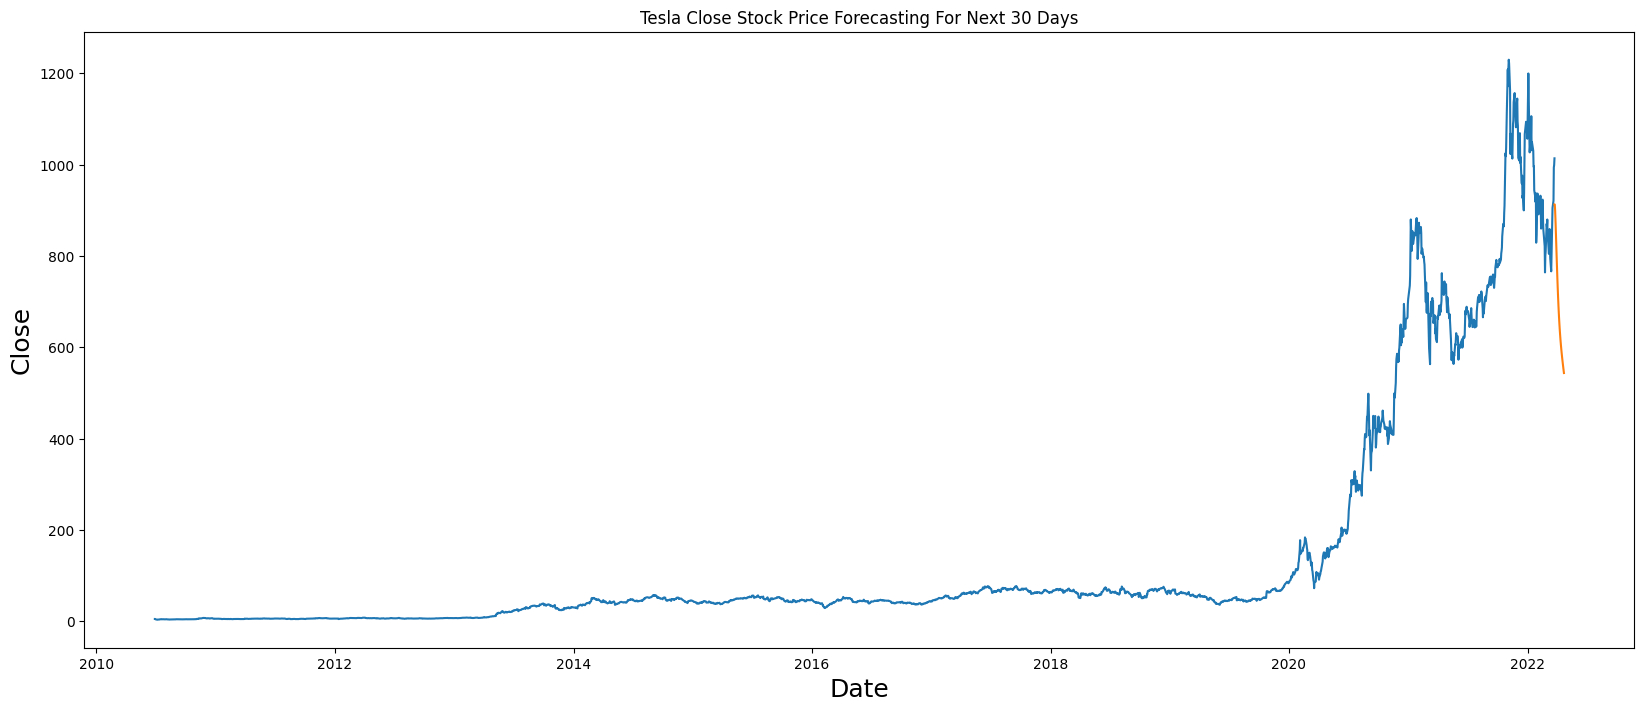

In [71]:
plt.figure(figsize=(20, 8))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(df_result.set_index('Date')[['Forecasted']])

In [72]:
import joblib

joblib.dump(model_LSTM, 'tesla_stock_model.pkl')



['tesla_stock_model.pkl']

In [74]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']